# Challenge

One of the topics that will be taught in Ironhack's data analytics course is machine learning. In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning. 

You will receive a dataset about home sale prices. The dataset is purposefully small and has a variety of variables so that training will not take long and you can focus on the machine learning workflow. Your task is to develop a machine learning model that predicts home sale prices based on the dataset.

There isn't a *correct* solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 40-60 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

**Instructions:**

* Download the [housing prices data set](http://localhost:8888/edit/exercises/data/housing_prices.csv) (`data/housing_prices.csv`).
* Using Python, analyze the features and determine which feature set to select for modeling.
* Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
* Evaluate all models and show comparison of performance metrics.
* State your thoughts on model performance, which model(s) you would select, and why.

**Deliverables Checklist:**

* Python code.
* Your thinking process.
* The features selected for machine learning.
* The results (e.g., performance metrics) of your selected model(s).

In [197]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

<h1 id="tocheading">Sommaire</h1>
<div id="toc"></div>

# Import

In [78]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPRegressor

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [79]:
!ls data/

data_description.txt housing_prices.csv
france.png           logo-ironhack.png


In [80]:
pd.set_option("display.max_columns", 9999)
pd.set_option("display.max_rows", 200)
df = pd.read_csv('./data/housing_prices.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
print(open('./data/data_description.txt').read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Descriptive analysis

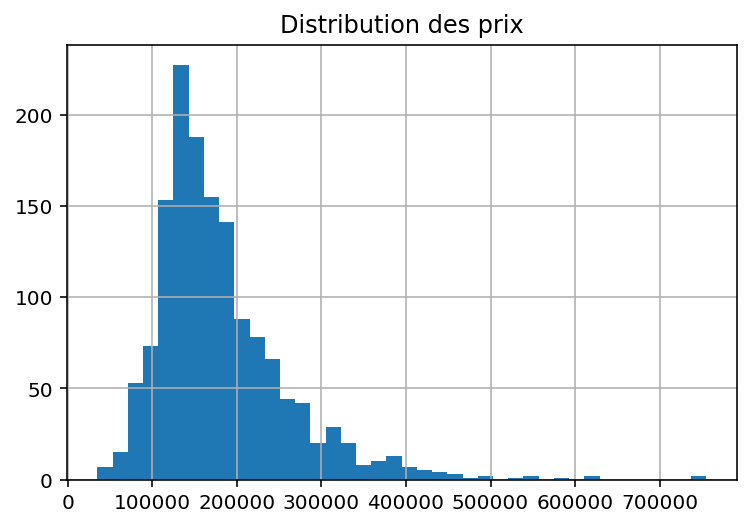

In [82]:
plt.title('Distribution des prix')
df['SalePrice'].hist(bins=40);

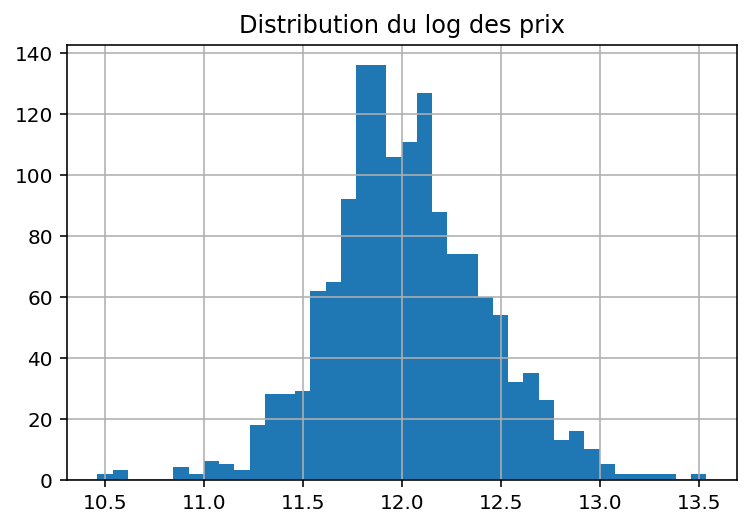

In [83]:
# On prend le log des prix car sa distribution est plus proche d'une gaussienne
plt.title('Distribution du log des prix')
df['LogSalePrice'] = df['SalePrice'].apply(np.log)
df['LogSalePrice'].hist(bins=40);

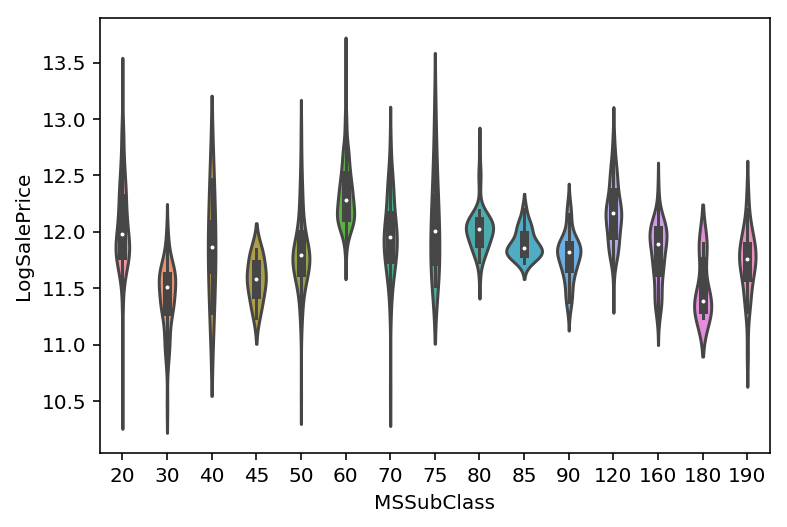

In [84]:
sns.violinplot(y="LogSalePrice", x="MSSubClass", data=df);

# Data preparation

### Data cleaning

In [85]:
target = df.LogSalePrice
df = df.drop('LogSalePrice', axis=1)

In [86]:
# drop useless columns
df.drop(['Id', 'SalePrice'], inplace=True, axis=1)

In [87]:
# check for constante feature
for col in df.columns:
    if len(df[col].unique()) < 2:
        print(col)

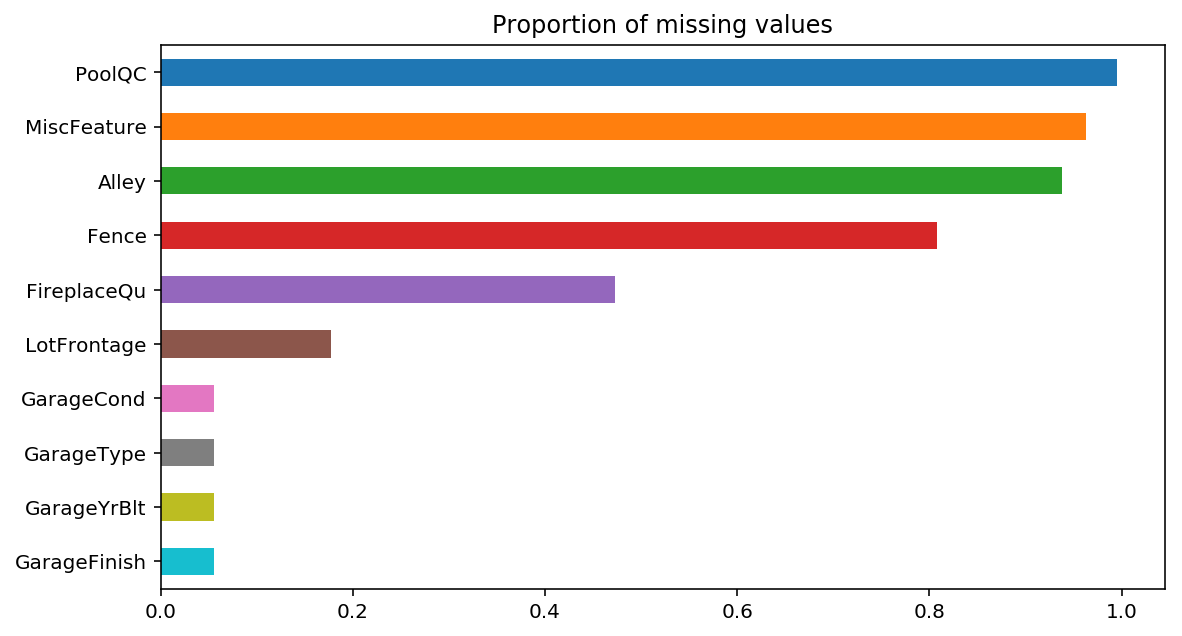

In [88]:
plt.figure(figsize=(9, 5))
ax = df.isnull().mean().sort_values(ascending=False)[:10].plot(kind="barh")
plt.title('Proportion of missing values')
ax.invert_yaxis()
plt.show()

In [89]:
# replace all NaN by mode
for col in df.columns:
    if (df[col].isnull().sum() != 0):
        df[col].fillna(df[col].mode()[0], inplace=True)

In [90]:
# numerize each value
for col in df.columns:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

### t-SNE / PCA

Variance expliquée : 90%


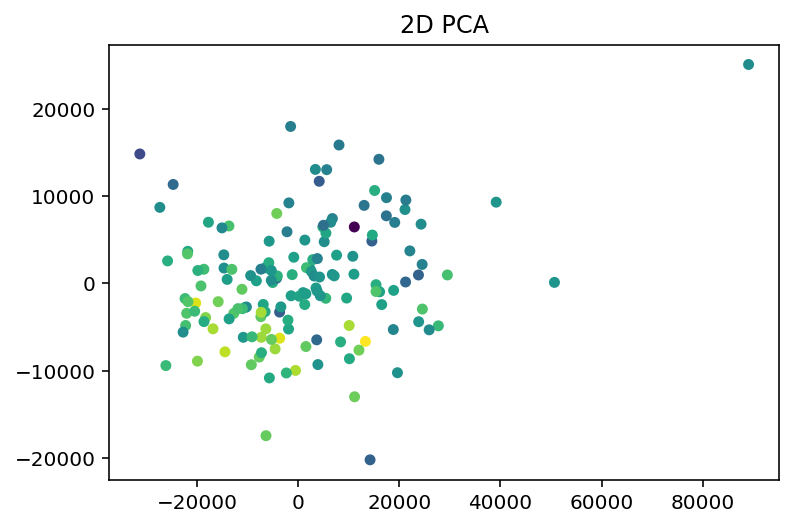

In [91]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(df[:150])
print('Variance expliquée : {0:.0f}%'.format(pca.explained_variance_ratio_.sum()*100))
plt.title('2D PCA')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target[:150], s=20);

/anaconda3/envs/conda_py36/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


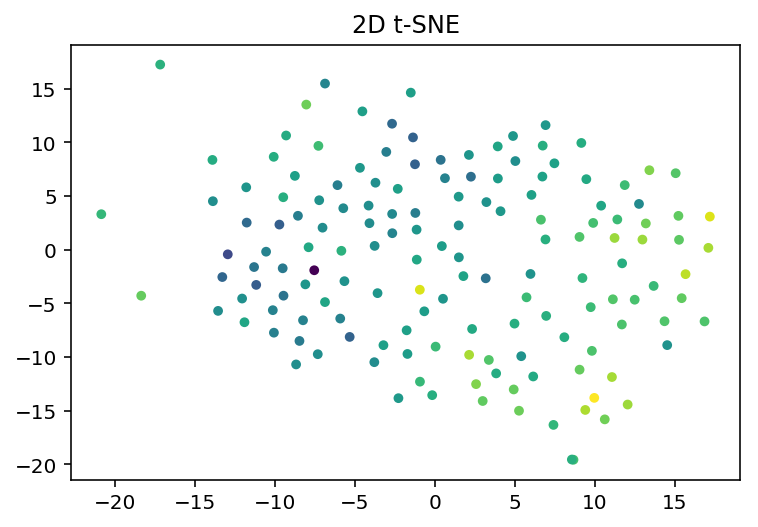

In [92]:
tsne = manifold.TSNE(n_components=2, init='random', perplexity=50, n_iter=300)
X_tsne = tsne.fit_transform(df[:150])
plt.title('2D t-SNE')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target[:150], s=15);

### Feature selection

Optimal number of features : 46


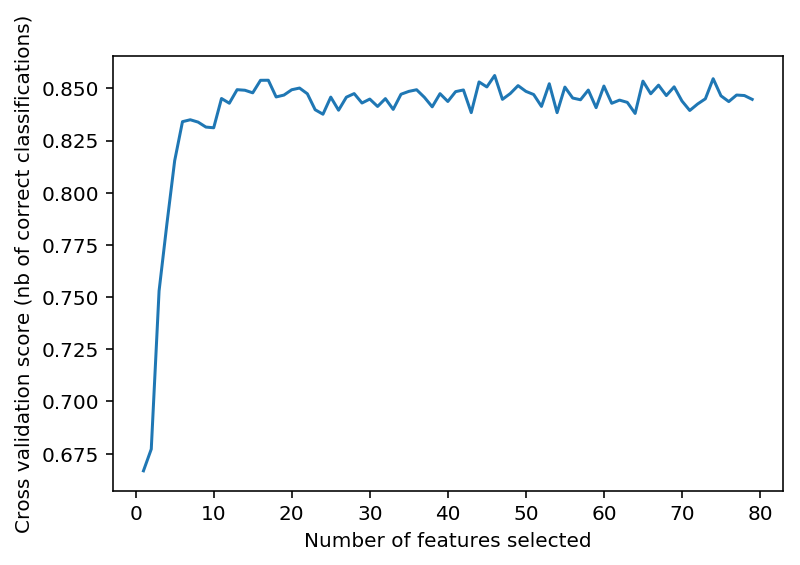

In [93]:
rfecv = RFECV(estimator=RandomForestRegressor(), step=1, cv=KFold(2), scoring='r2')
rfecv.fit(df, target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [95]:
selector = RFE(RandomForestRegressor(), 10, step=1).fit(df, target)
df = df.iloc[:, selector.support_]

# Model creation

### Importance of features

mse score: 0.023119553674521502


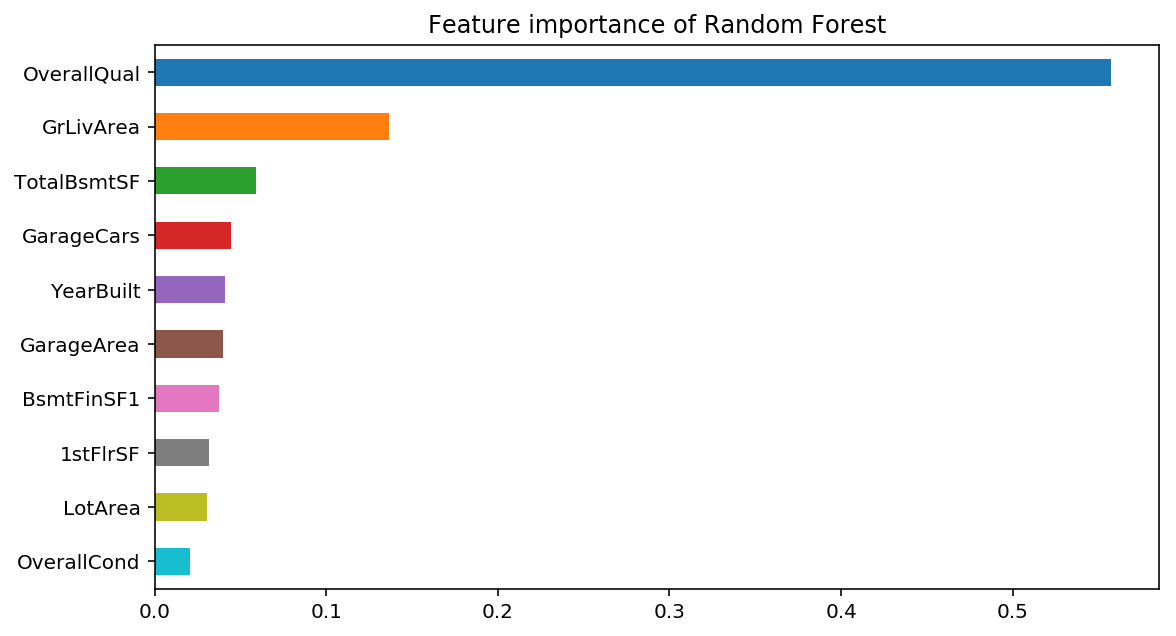

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
mse = mean_squared_error(y_test, rf.predict(X_test))
print(f'mse score: {mse}')

plt.figure(figsize=(9, 5))
fi_result = pd.DataFrame(rf.feature_importances_, index=X_train.columns).T
fi_grouped = fi_result.iloc[0].sort_values(ascending=False)[:10]
ax = fi_grouped.plot(kind="barh")
plt.title('Feature importance of Random Forest')
ax.invert_yaxis()
plt.show()

### Multi-model + blend

In [123]:
classifiers = [RandomForestRegressor(),
               #AdaBoostRegressor(),
               GradientBoostingRegressor(),
               #ElasticNet(),
               #MLPRegressor(),
               xgb.XGBRegressor(),
               lgb.LGBMRegressor()]

df_blend = pd.DataFrame()
for clf in classifiers:
    print(clf.__class__.__name__, '\n' + '****Results****')
    clf.fit(X_train, y_train)
    df_blend[clf.__class__.__name__] = clf.predict(X_test)
    print('score', mean_squared_error(y_test, df_blend[clf.__class__.__name__]), '\n\n')

RandomForestRegressor 
****Results****
score 0.023958379631175197 


GradientBoostingRegressor 
****Results****
score 0.01964627673141853 


XGBRegressor 
****Results****
score 0.02257815721235575 


LGBMRegressor 
****Results****
score 0.02243519094588879 




In [124]:
print('score blend: ', mean_squared_error(y_test, df_blend.mean(axis=1)))

score blend:  0.020409454463067803


### XGBoost

In [125]:
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=5000,
                   early_stopping_rounds=50,
                   verbose_eval=100,
                   show_stdv=False)
num_boost_rounds = len(cv_result)
print('\ntree number : {}'.format(num_boost_rounds))

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

# score
print(f'mse score: {mean_squared_error(y_test, model.predict(dtest))}')

[0]	train-rmse:11.4797	test-rmse:11.4797
[100]	train-rmse:6.96565	test-rmse:6.96559
[200]	train-rmse:4.23136	test-rmse:4.23158
[300]	train-rmse:2.57491	test-rmse:2.57531
[400]	train-rmse:1.57177	test-rmse:1.57268
[500]	train-rmse:0.964556	test-rmse:0.966801
[600]	train-rmse:0.597411	test-rmse:0.602733
[700]	train-rmse:0.376681	test-rmse:0.386929
[800]	train-rmse:0.246091	test-rmse:0.263535
[900]	train-rmse:0.171287	test-rmse:0.197665
[1000]	train-rmse:0.13046	test-rmse:0.165307
[1100]	train-rmse:0.109213	test-rmse:0.150632
[1200]	train-rmse:0.0981427	test-rmse:0.144264
[1300]	train-rmse:0.0918973	test-rmse:0.14128
[1400]	train-rmse:0.0878913	test-rmse:0.139812
[1500]	train-rmse:0.084928	test-rmse:0.138958
[1600]	train-rmse:0.0823043	test-rmse:0.13846
[1700]	train-rmse:0.0799113	test-rmse:0.138143
[1800]	train-rmse:0.0777493	test-rmse:0.137916
[1900]	train-rmse:0.0757227	test-rmse:0.137732
[2000]	train-rmse:0.0737923	test-rmse:0.13765
[2100]	train-rmse:0.0719887	test-rmse:0.137517
[2200

In [109]:
model.get_score()

{'OverallQual': 1601,
 'GrLivArea': 3236,
 'GarageCars': 497,
 'YearBuilt': 3719,
 'TotalBsmtSF': 2213,
 '1stFlrSF': 1921,
 'GarageArea': 2237,
 'LotArea': 4275,
 'OverallCond': 2062,
 'BsmtFinSF1': 2368}

### Residual study

In [138]:
x = range(len(y_test))
permutation_sorted_ground_truth = y_test.argsort()
y = np.exp(y_test).reset_index()['LogSalePrice'][permutation_sorted_ground_truth]
sorted_predictions = np.exp(model.predict(dtest))[permutation_sorted_ground_truth]

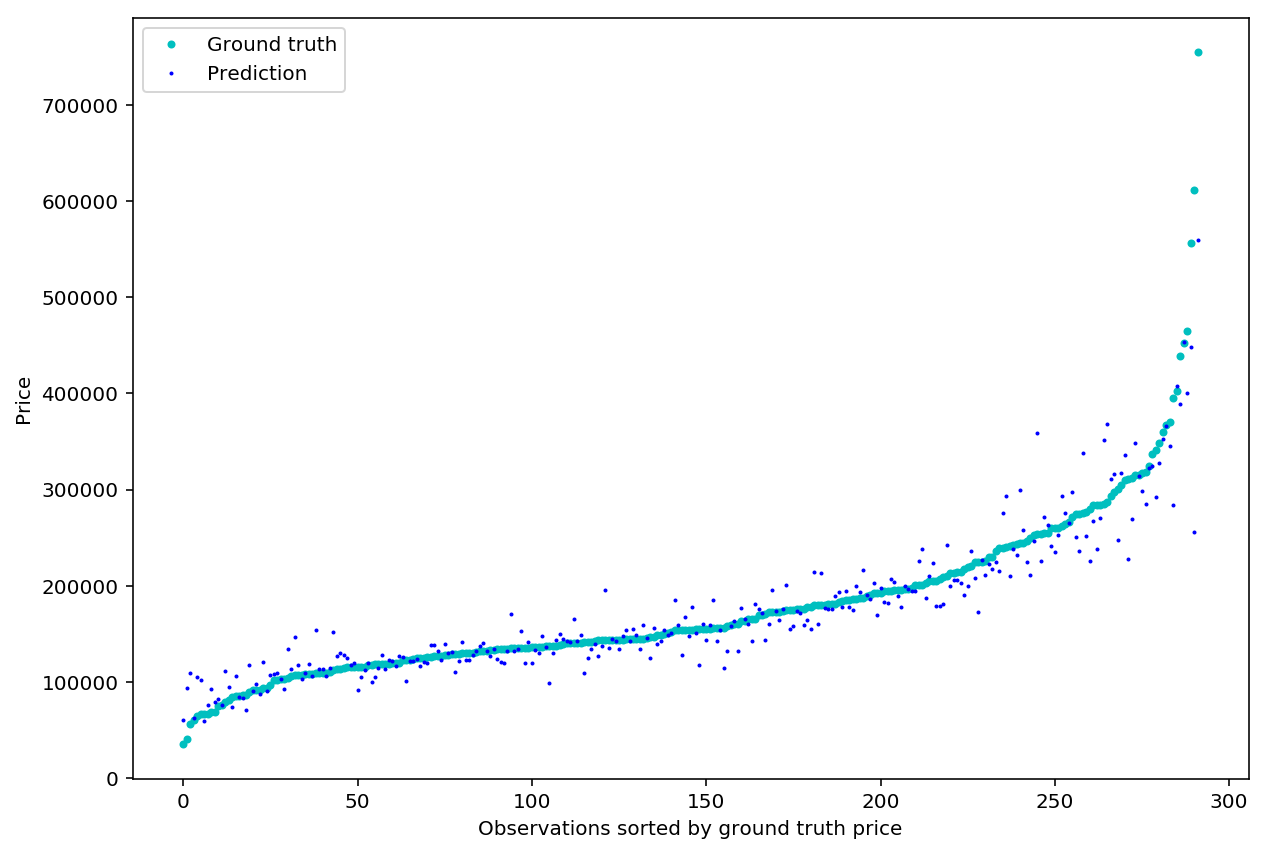

In [143]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, color='c', marker='o', markersize=3, label='Ground truth', linestyle='None')
plt.plot(x, sorted_predictions, color='b', marker='o', markersize=1, label='Prediction', linestyle='None')
plt.ylabel('Price')
plt.xlabel('Observations sorted by ground truth price')
plt.legend(loc='upper left')
plt.show()

# Confidence intervals with random forest
see my post https://blog.octo.com/les-intervalles-de-prediction/

In [188]:
def compute_prediction_interval(model, data_eval, percentile=95):
    decision_tree_list = model.estimators_
    lower_bound = (100 - percentile) / 2.
    upper_bound = 100 - lower_bound
    # this is the matrix of each predictions for each trees
    decision_tree_prediction_matrix = [_compute_prediction_of_each_tree(decision_tree_list, data_eval.iloc[i]) for i in
                                       range(data_eval.shape[0])]
    lower_bound_prediction_list = [np.percentile(prediction_list, lower_bound) for prediction_list in
                                   decision_tree_prediction_matrix]
    upper_bound_prediction_list = [np.percentile(prediction_list, upper_bound) for prediction_list in
                                   decision_tree_prediction_matrix]
    return lower_bound_prediction_list, upper_bound_prediction_list

def _compute_prediction_of_each_tree(decision_tree_list, row):
    return [decision_tree.predict(np.array(row).reshape(1, -1))[0] for decision_tree in decision_tree_list]

def plot_eval_prediction_interval(target_eval, prediction, lower_error_list, upper_error_list, figsize=(10, 7)):
    x = range(len(prediction))
    permutation_sorted_ground_truth = target_eval.argsort()
    y = np.exp(target_eval).reset_index()['LogSalePrice'][permutation_sorted_ground_truth]
    sorted_predictions = np.exp(prediction)[permutation_sorted_ground_truth]
    upper_error = np.exp(np.array(upper_error_list)[permutation_sorted_ground_truth]) - sorted_predictions
    lower_error = sorted_predictions - np.exp(np.array(lower_error_list)[permutation_sorted_ground_truth])
    plt.figure(figsize=figsize)
    plt.plot(x, y, color='c', marker='o', markersize=4, label='True values', linestyle='None')
    plt.errorbar(x, sorted_predictions, yerr=[lower_error, upper_error], fmt='bo', label='Predicted values', capsize=3, markersize=2)
    plt.ylabel('Response value')
    plt.xlabel('Sample no.')
    plt.legend(loc='upper left')
    plt.show()

In [170]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, min_samples_leaf=1)
rf.fit(X_train, y_train)
lower_error_list, upper_error_list = compute_prediction_interval(rf, X_test, percentile=90)

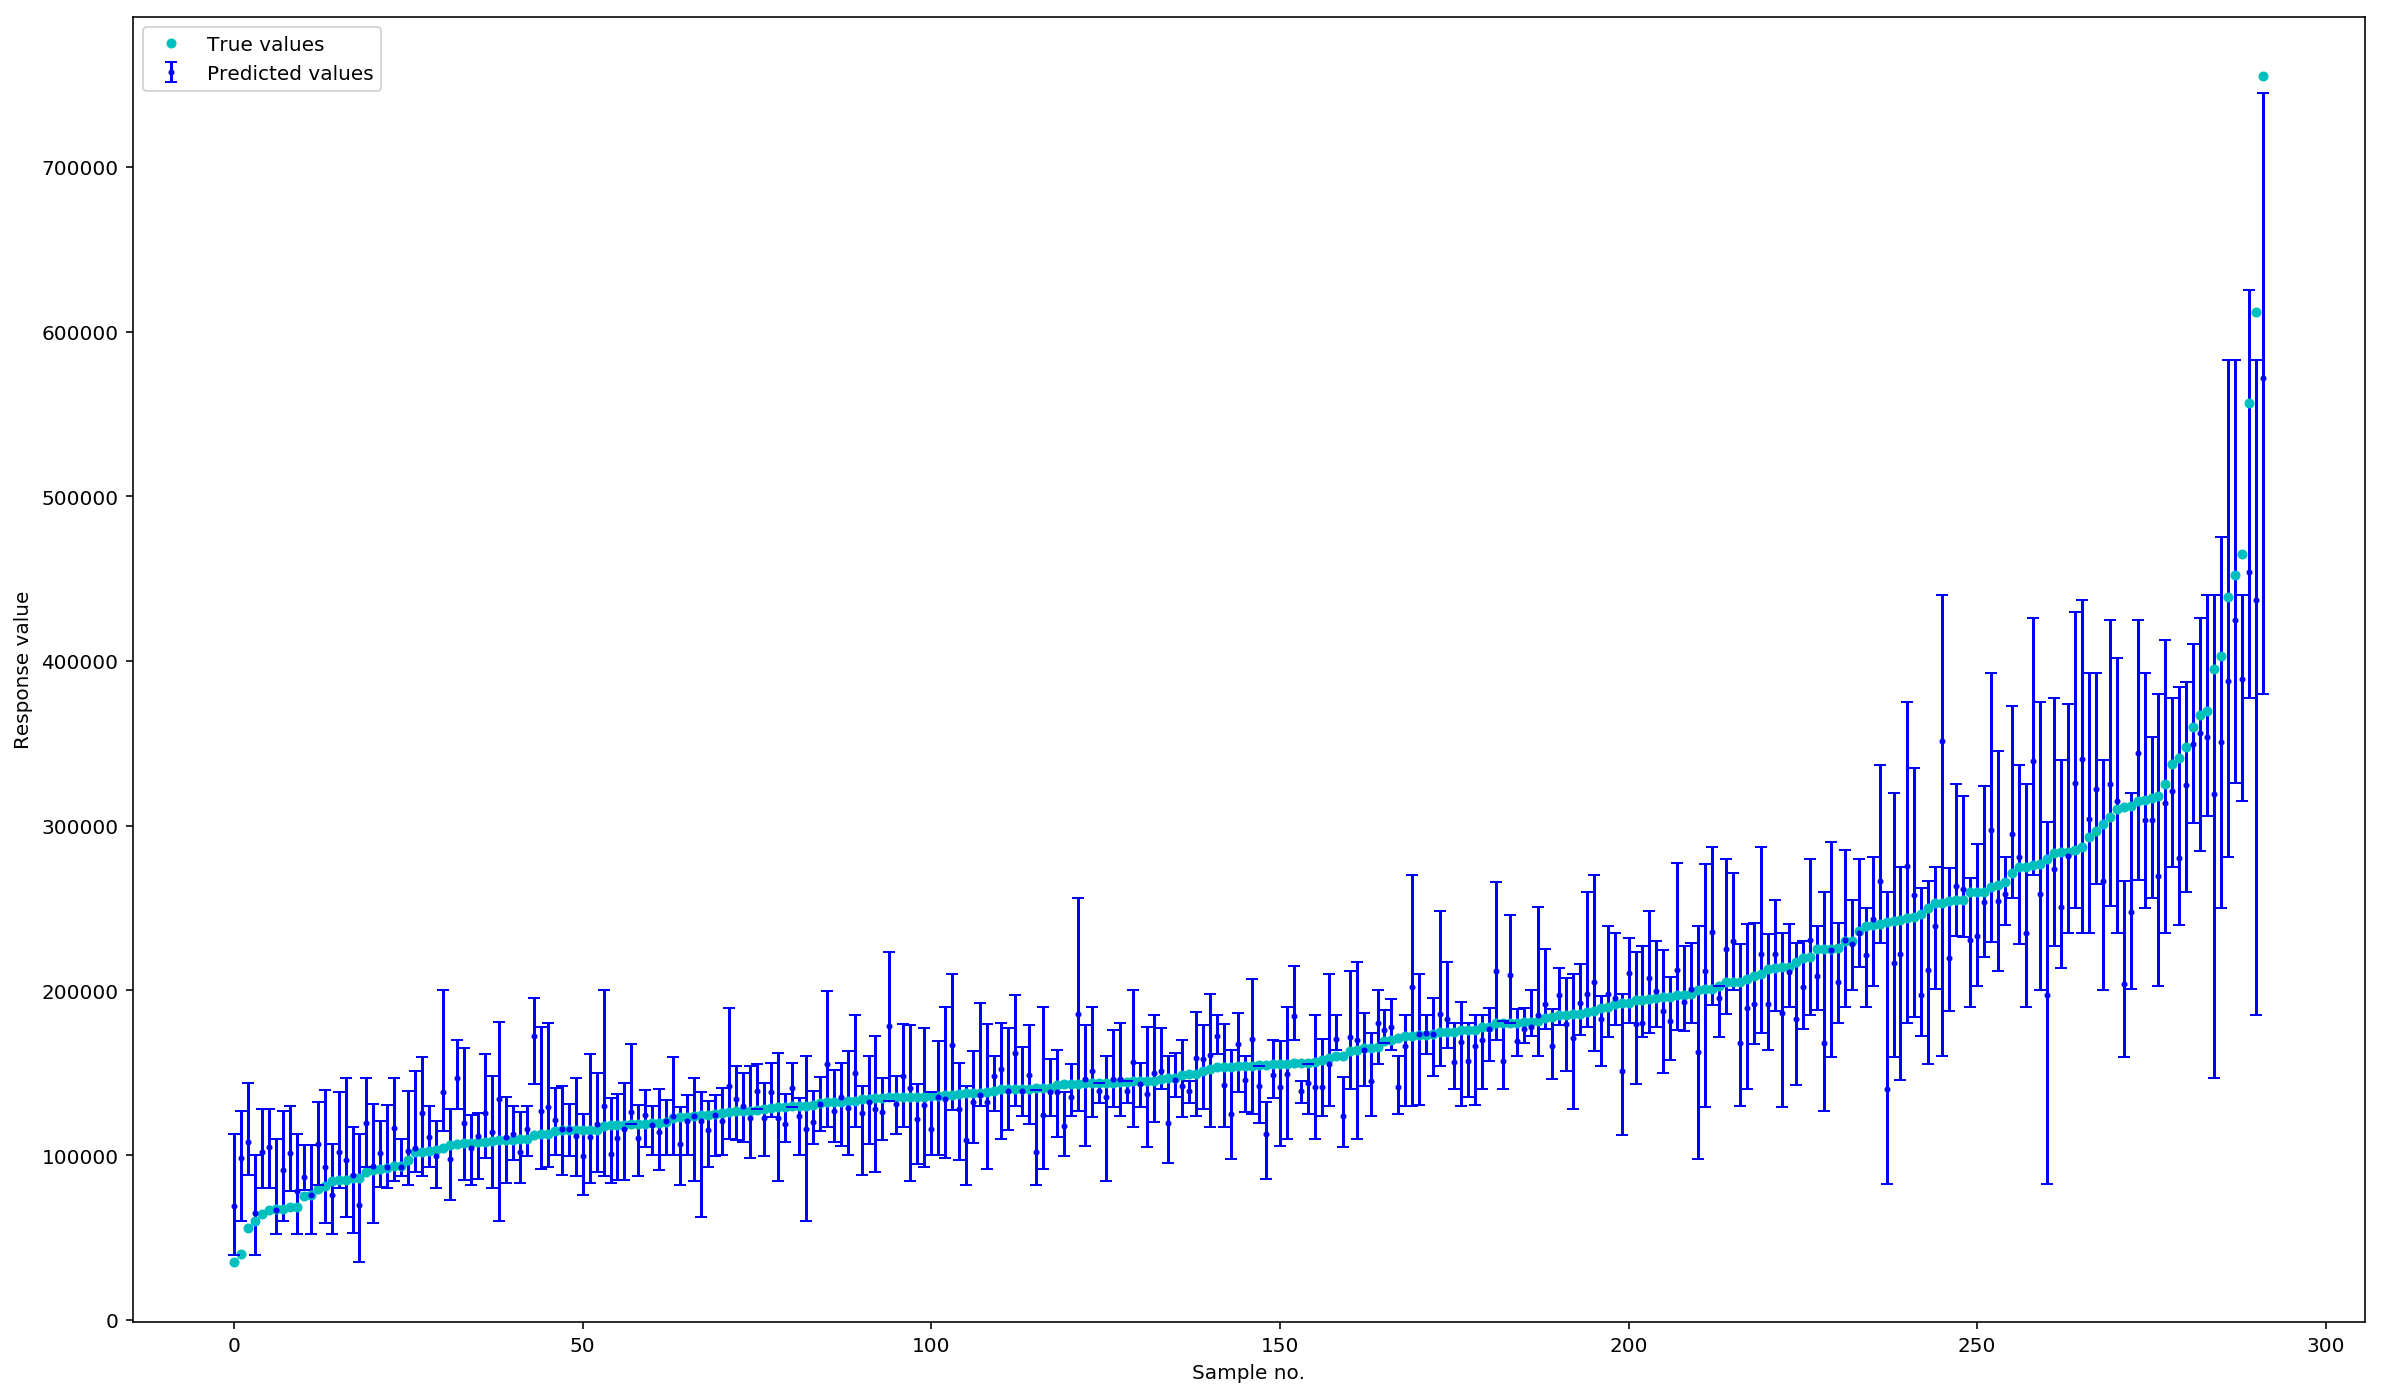

In [189]:
plot_eval_prediction_interval(y_test, rf.predict(X_test), lower_error_list, upper_error_list, figsize=(20, 12))

Our random forest predictions do not fit well high values

# Interpretation

In [190]:
explainer = shap.TreeExplainer(rf)
data_for_prediction = X_test.iloc[0]
shap_values = explainer.shap_values(data_for_prediction)

In [196]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

We can tell precisely for this prediction what is the role of each feature